# Logistic Regression
## Details about Dataset:
### In the Data Cleaning Assignment I have came across 6 different dataset after cleaning from our raw dataset

## So We end up with 6 new datasets
1. **encoded_binary {Values with yes/no, Male/Female}**
    1. 'Gender'
    2. 'Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?'
    3. 'Did you participate in any extra curricular activities while you were studying in NSU?'
    4. 'Were you interested in coding?'
    5. 'Did you participate in any competitive programming?'
    5. 'Did you start working as a software engineer after graduation?'
    7. 'Did you have any Start-ups after graduation?'



2. **encoded_ordinal {Values that maintains an order}**
    1. 'Cumulative Grade Point Average(CGPA)',
    2. 'Number of publications',
    3. 'What was your starting salary range?' 

3. **df_PL_encoded {Programing Languages You know} [One Hot Encoding]**

4. **df_FoR_encoded {Fields of Research Interest} [One Hot Encoding]**

5. **df_FW_encoded {FrameWorks You know} [One Hot Encoding]**

6. **encoded_Dependable {Columns that maybe used as target variable}**
    1. 'Where did you start working after completing your higher studies?',
    2. 'Which country did you go to for higher studies?',
    3. 'What was the name of the University you completed your higher studies from? if answer is no write N/A.'

## So after seeing the correlation matrix in the data cleaning section I have selected the 
1. encoded_binary
2. encoded_ordinal
3. encoded_Dependable 

## Datasets to work with further. 
### So feature selection was done their (I am also attaching the Data cleaning Notebook file here)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("encBin-endOrd-encDep.csv")
df

,Gender,Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?,Did you participate in any extra curricular activities while you were studying in NSU?,Were you interested in coding?,Did you participate in any competitive programming?,Did you start working as a software engineer after graduation?,Did you have any Start-ups after graduation?,Cumulative Grade Point Average(CGPA),Number of publications,What was your starting salary range?,Where did you start working after completing your higher studies?,Which country did you go to for higher studies?,What was the name of the University you completed your higher studies from? if answer is no write N/A.
0,1,0,1,1,1,0,0,2,1,1,1,6,2
1,1,1,1,1,1,0,0,3,3,2,2,6,13
2,0,1,1,1,1,1,0,3,1,3,2,6,3
3,1,1,1,1,0,0,0,3,2,1,0,2,12
4,0,0,0,0,0,0,0,3,1,1,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,1,0,0,0,0,0,0,3,0,1,1,3,5
60,1,0,1,1,1,1,0,3,0,0,1,3,5
61,1,1,0,1,1,1,0,3,0,0,0,1,5
62,1,1,1,1,0,1,0,3,1,2,2,3,5


# Data Visualization

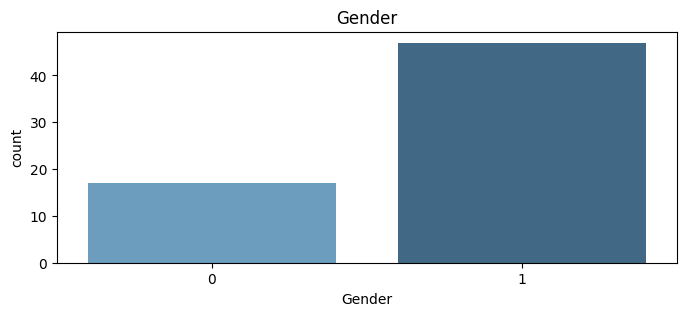

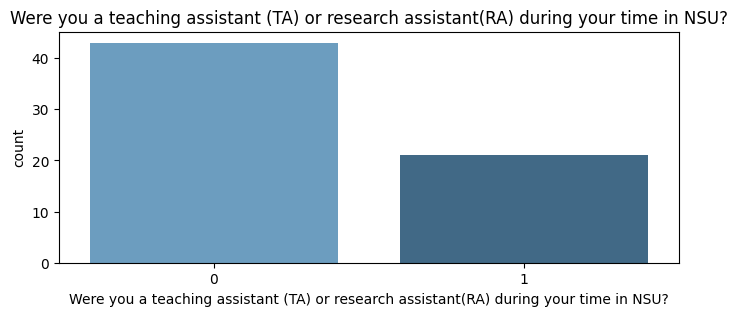

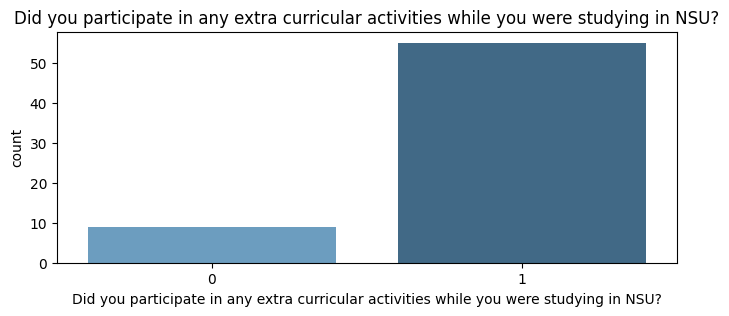

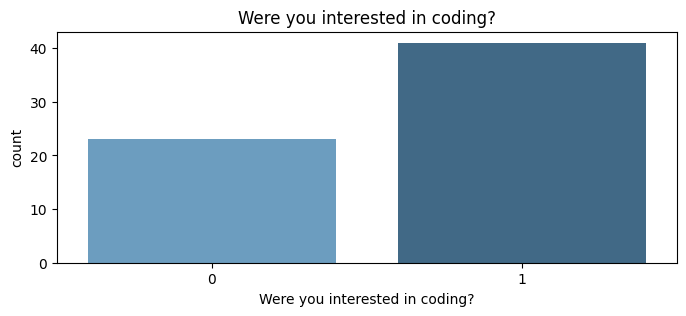

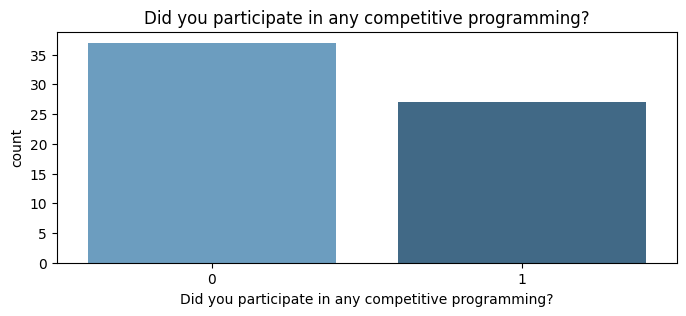

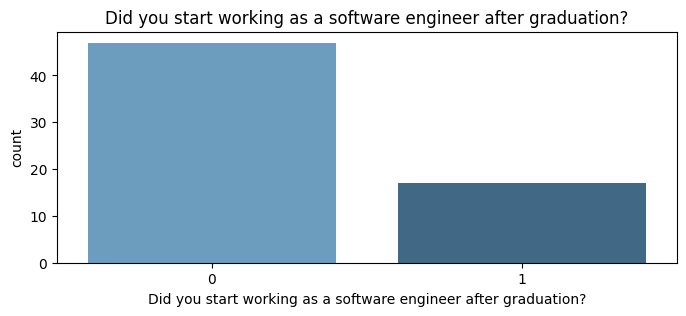

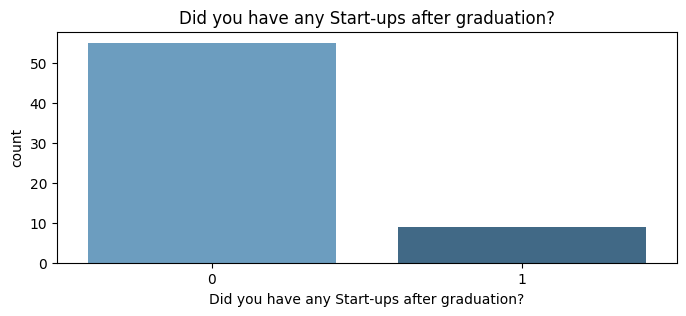

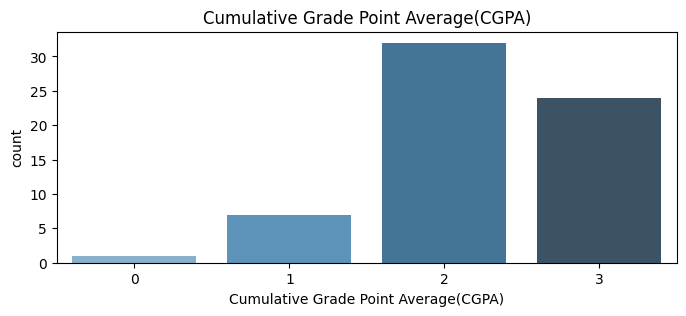

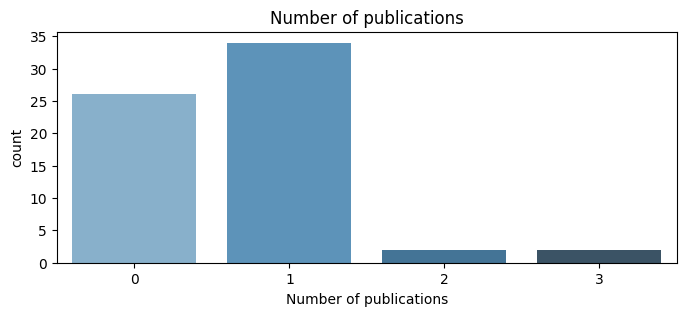

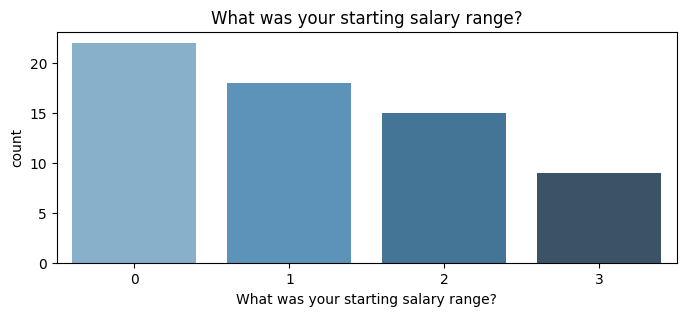

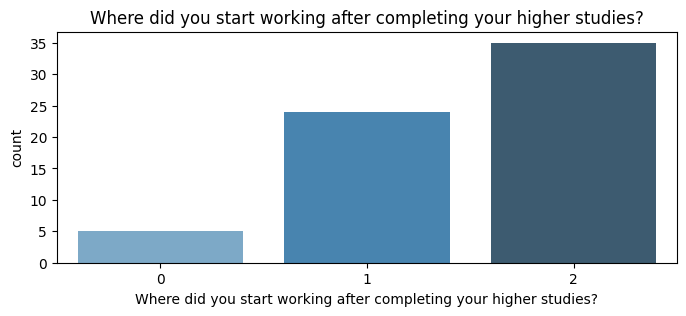

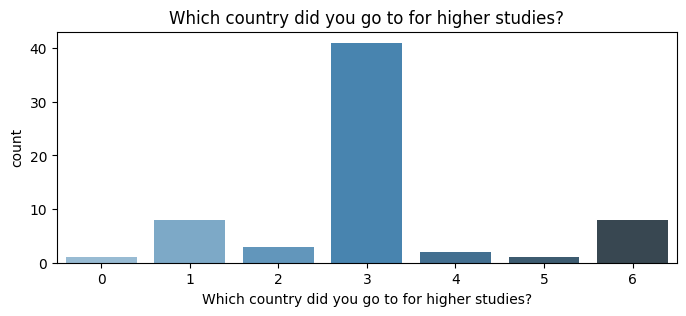

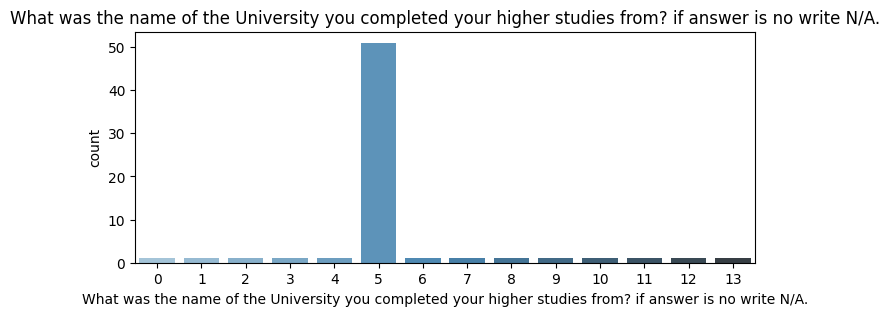

In [3]:
for i in df.columns:
    plt.figure(figsize=(8, 3))
    sns.barplot(x=df[i].value_counts().index, y=df[i].value_counts(), palette="Blues_d")
    plt.title(i)
    plt.show()

In [4]:
df.columns

Index(['Gender',
       'Were you a teaching assistant (TA) or research assistant(RA) during your time in NSU?',
       'Did you participate in any extra curricular activities while you were studying in NSU?',
       'Were you interested in coding?',
       'Did you participate in any competitive programming?',
       'Did you start working as a software engineer after graduation?',
       'Did you have any Start-ups after graduation?',
       'Cumulative Grade Point Average(CGPA)', 'Number of publications',
       'What was your starting salary range?',
       'Where did you start working after completing your higher studies?',
       'Which country did you go to for higher studies?',
       'What was the name of the University you completed your higher studies from? if answer is no write N/A.'],
      dtype='object')

### In our 'Where did you start working after completing your higher studies?' column the unique values are: 

1. 0 for Educational institute
2. 1 for Industry
3. 2 for Not working

## We will only have 2 unique values. 
## 0 for Educational institute and Not working 
## 1 for Industry

In [5]:
df['Where did you start working after completing your higher studies?'].unique()

array([1, 2, 0], dtype=int64)

In [6]:
df['Where did you start working after completing your higher studies?'] = df['Where did you start working after completing your higher studies?'].replace({
    2: 0,
})

In [7]:
df['Where did you start working after completing your higher studies?'].unique()

array([1, 0], dtype=int64)

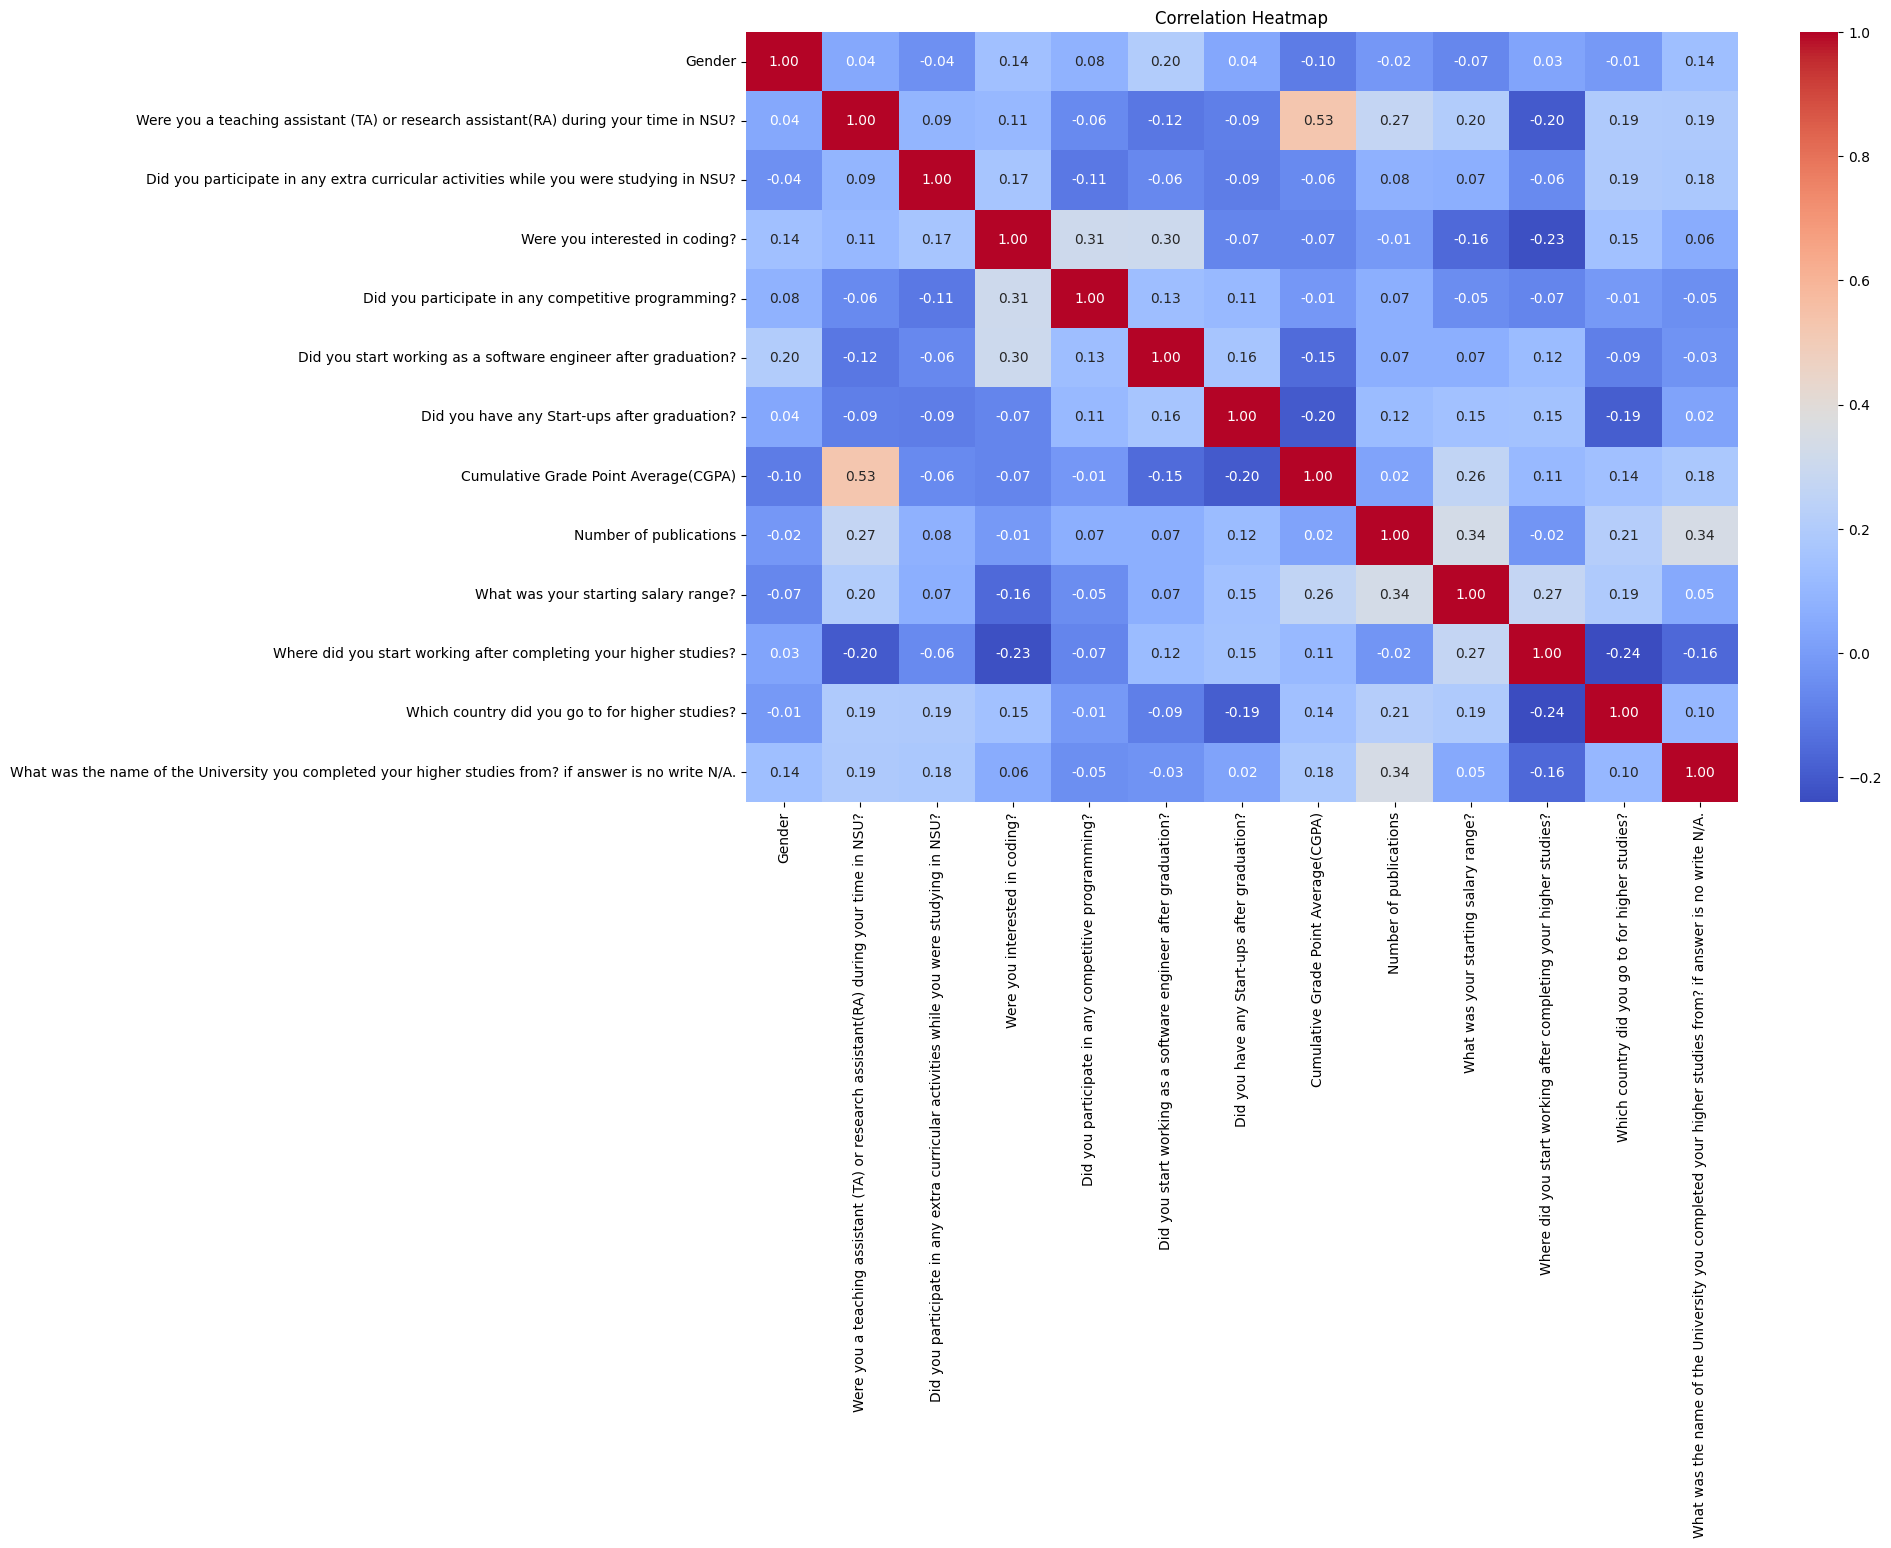

In [8]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

### We can see that Some columns have really low correlation with the target variable ('Where did you start working after completing your higher studies?')
## So we drop some of the columns that are low correlated to the target variable

In [9]:
df.drop('Gender', axis=1, inplace=True)
df.drop('Did you participate in any competitive programming?', axis=1, inplace=True)
df.drop('Number of publications', axis=1, inplace=True)
df.drop('Did you participate in any extra curricular activities while you were studying in NSU?', axis=1, inplace=True)

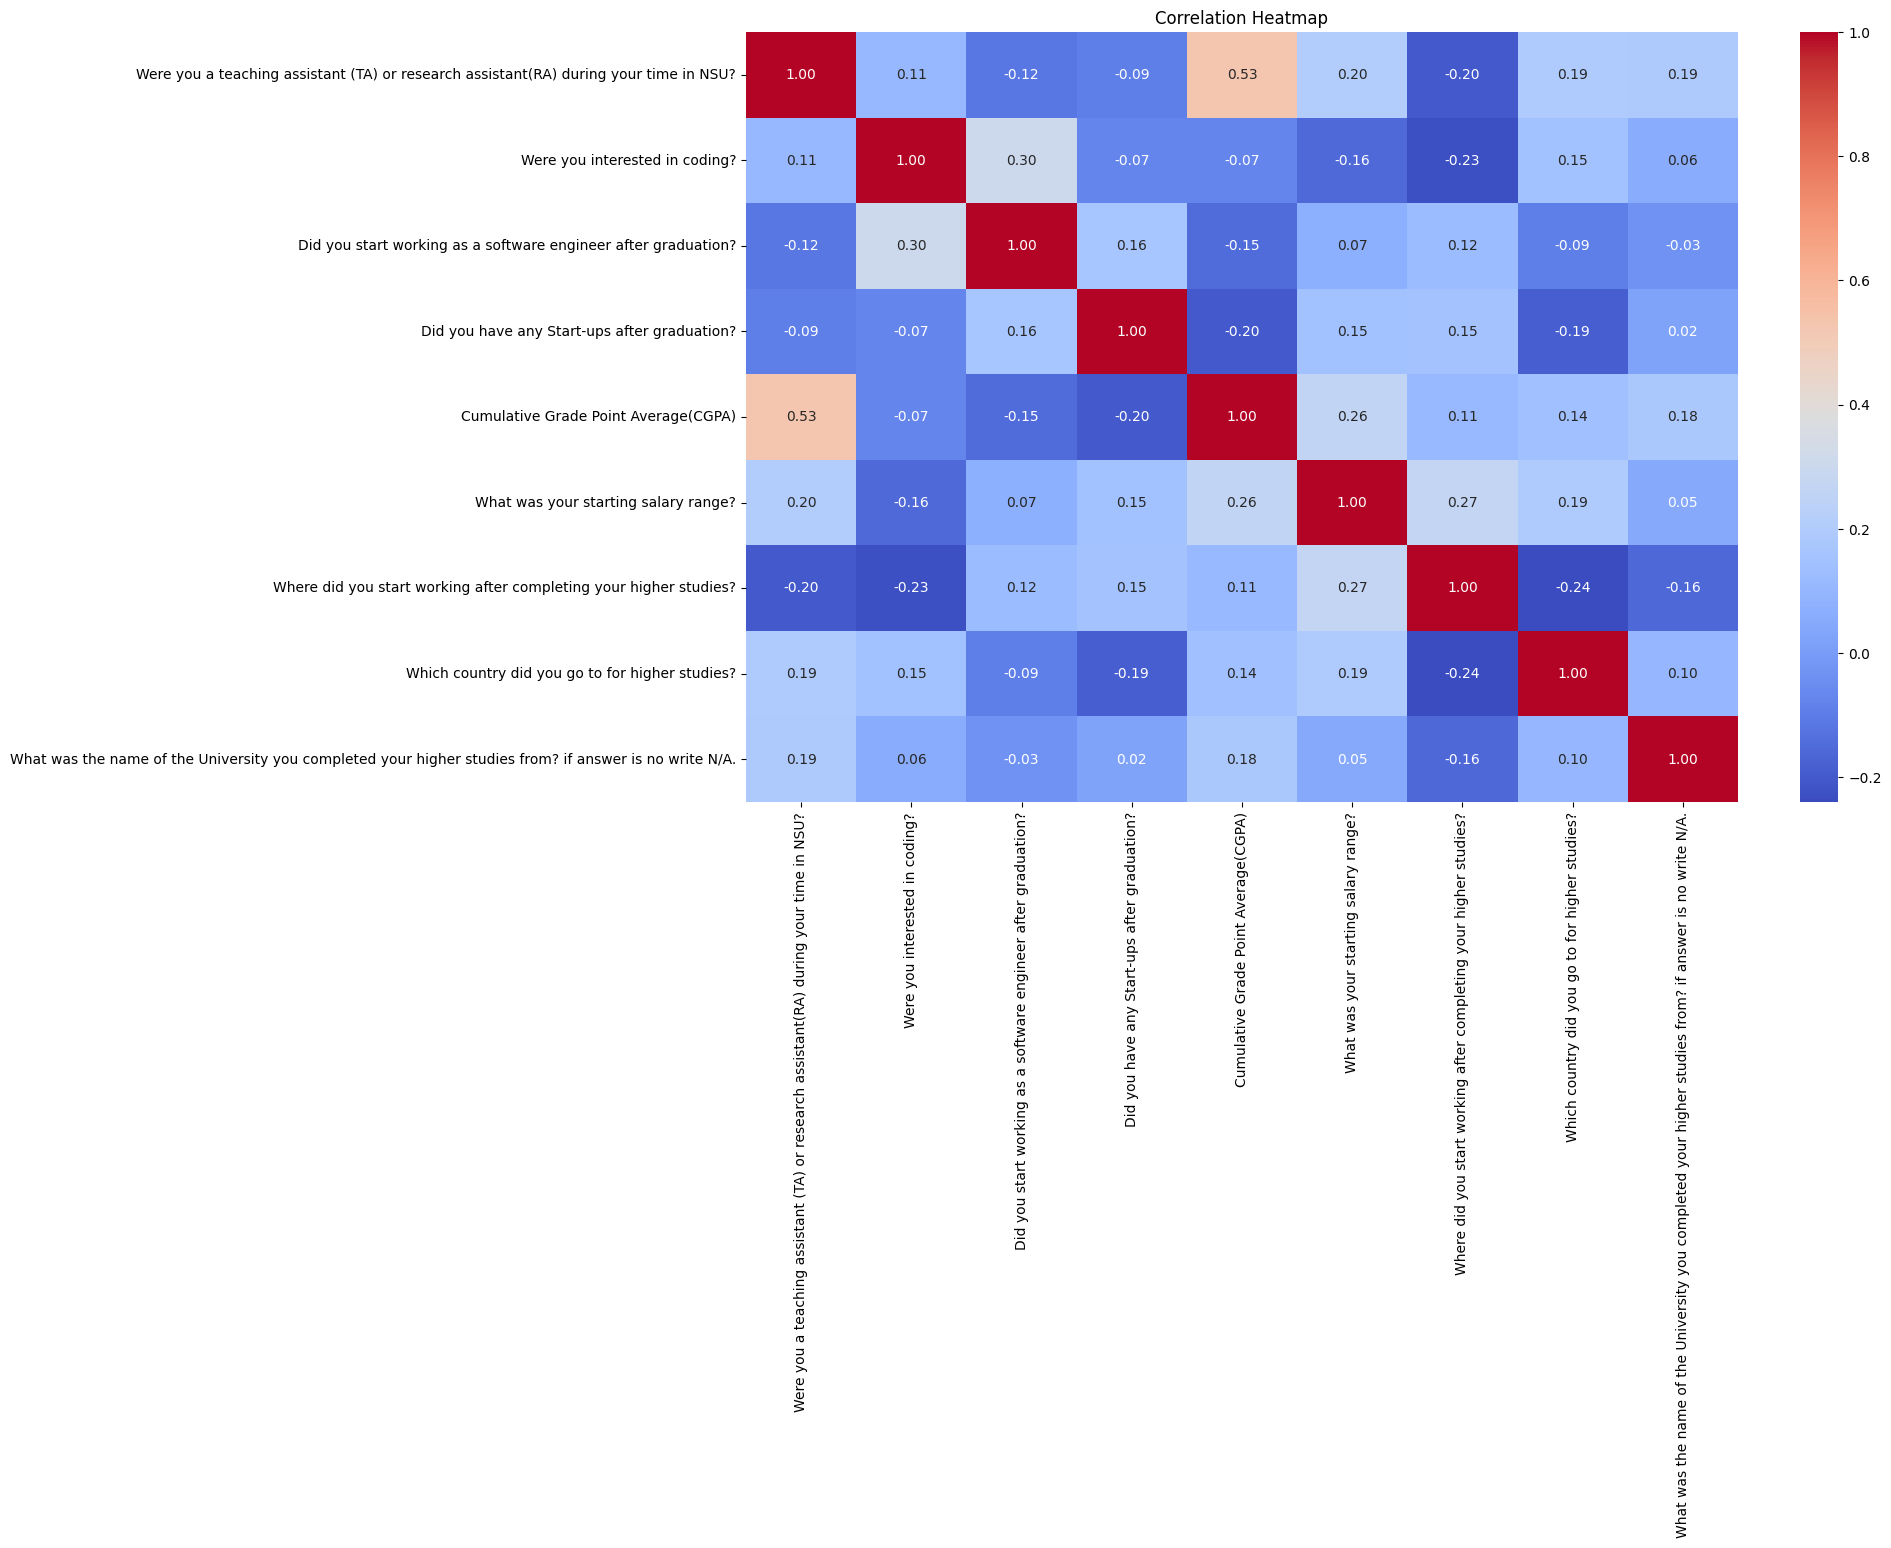

In [10]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Making Independant and Dependant Dataframes

In [11]:
X = df.drop('Where did you start working after completing your higher studies?', axis=1)

y = df['Where did you start working after completing your higher studies?']

## And splitting them into Train and Test Split
## Test size is 30% and random state is 4

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (44, 8)
X_test shape: (20, 8)
y_train shape: (44,)
y_test shape: (20,)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [14]:
model = LogisticRegression(max_iter=1000)  # Increase max_iter if necessary
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.75
Confusion Matrix:
 [[11  0]
 [ 5  4]]


In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       1.00      0.44      0.62         9

    accuracy                           0.75        20
   macro avg       0.84      0.72      0.72        20
weighted avg       0.83      0.75      0.73        20



# Got an Accuracy of 75%
## Showing the Confusion Matrix

Accuracy: 0.75
Precision: 0.828125
Recall: 0.75
F1 Score: 0.7250712250712249


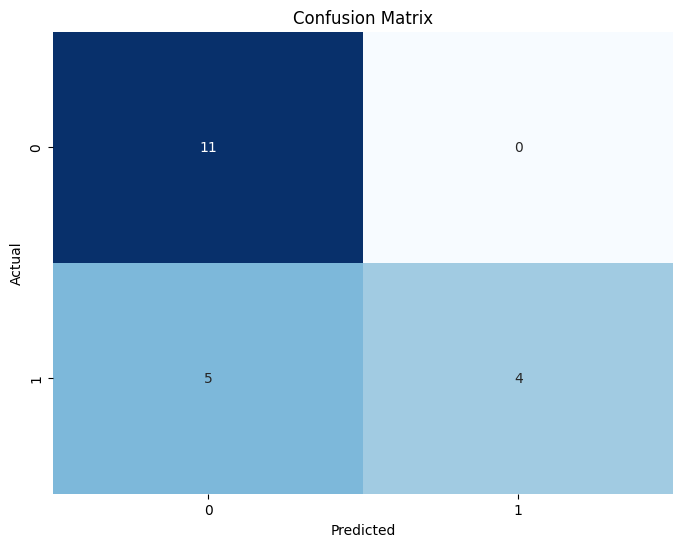

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()